<a href="https://colab.research.google.com/github/nishanthnandakumar/Machine_Learning/blob/main/randomforestclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#This file consists of code to understand the working of Random Forest Classifiers

#It is a supervised learning algorithm. The more the trees it has the more the robust the forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.

# https://www.datacamp.com/community/tutorials/random-forests-classifier-python refer to this webpage for more details


#importing scikit learn dataset library
from sklearn import datasets
#for creating a dataframe
import pandas as pd
#Import train_test_split function
from sklearn.model_selection import train_test_split
#Import Random forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#load datasets
iris = datasets.load_iris()

#print the label species
print(iris.target_names)
#print the names of the four features
print(iris.feature_names)

#print the first five records of the iris data
print(iris.data[0:5])

#print the iris labels
print(iris.target)

#Creating a Dataframe of given iris dataset

data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
     })
data.head() 

#Spliting the data into train and test
X=data[['sepal length','sepal width','petal length','petal width']] #Features
y=data['species'] #labels

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) #70% training and 30% testing

#creating a gaussian classifier
clf=RandomForestClassifier(n_estimators=100)

#Train  the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Model accuracy how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Accuracy: 0.9333333333333333


In [12]:
clf.predict([[3, 5, 4, 2]])

array([2])

In [14]:
#Finding important features in Scikit-learn

from sklearn.ensemble import RandomForestClassifier

#Create a Guassian Classifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
import pandas as pd

feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp


petal width (cm)     0.438598
petal length (cm)    0.419427
sepal length (cm)    0.105666
sepal width (cm)     0.036309
dtype: float64

No handles with labels found to put in legend.


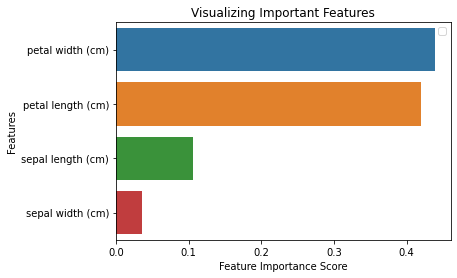

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

#Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [19]:
#Since the sepal width feature has very low importance we can remove that

from sklearn.model_selection import train_test_split

#split dataset into features and labels
X=data[['petal length','petal width','sepal length']] #removed the feature "sepal length"
y=data['species']

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7,random_state=5) #70% training and 30% testing


In [20]:
from sklearn.ensemble import RandomForestClassifier

#Create a Guassian Classifier
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9523809523809523
